<a href="https://colab.research.google.com/github/dhivyasreedhar/Spoken_Digit_Recognition/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras
!pip install tensorflow

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical

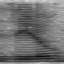

In [3]:
img=image.load_img("/content/drive/MyDrive/DigitSpectograms/0_george_19.png")
img

In [4]:
img_arr=image.img_to_array(img)
print(img_arr.shape)

(64, 64, 3)


In [5]:
img_arr=np.expand_dims(img_arr,axis=0)
print(img_arr.shape)

(1, 64, 64, 3)


In [6]:

imagesDir="/content/drive/MyDrive/DigitSpectograms/"
trainset=[]
testset=[]
for file in os.listdir(imagesDir):
  label=file.split('_')[0]
  sample_number=file.split('_')[2]
  img=image.load_img(imagesDir+file)
  if sample_number in ['0.png','1.png','2.png','3.png','4.png']:
    testset.append([image.img_to_array(img),label])
  else:
    trainset.append([image.img_to_array(img),label])

In [7]:
X_train=[item[0] for item in trainset]
y_train=[item[1] for item in trainset]

X_test=[item[0] for item in testset]
y_test=[item[1] for item in testset]


In [8]:
X_test

[array([[[121., 121., 121.],
         [121., 121., 121.],
         [121., 121., 121.],
         ...,
         [224., 224., 224.],
         [224., 224., 224.],
         [224., 224., 224.]],
 
        [[123., 123., 123.],
         [123., 123., 123.],
         [123., 123., 123.],
         ...,
         [176., 176., 176.],
         [176., 176., 176.],
         [176., 176., 176.]],
 
        [[121., 121., 121.],
         [121., 121., 121.],
         [121., 121., 121.],
         ...,
         [176., 176., 176.],
         [176., 176., 176.],
         [176., 176., 176.]],
 
        ...,
 
        [[ 48.,  48.,  48.],
         [ 48.,  48.,  48.],
         [ 48.,  48.,  48.],
         ...,
         [ 87.,  87.,  87.],
         [ 87.,  87.,  87.],
         [ 87.,  87.,  87.]],
 
        [[ 75.,  75.,  75.],
         [ 75.,  75.,  75.],
         [ 75.,  75.,  75.],
         ...,
         [109., 109., 109.],
         [109., 109., 109.],
         [109., 109., 109.]],
 
        [[ 88.,  88.,  88.],
 

In [9]:
# Convert list to numpy array in order to define input shape
X_train = np.asanyarray(X_train)
y_train = np.asanyarray(y_train)
X_test = np.asanyarray(X_test)
y_test = np.asanyarray(y_test)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2700, 64, 64, 3) (300, 64, 64, 3) (2700,) (300,)


In [11]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2700, 64, 64, 3) (300, 64, 64, 3) (2700, 10) (300, 10)


In [13]:
# Save data to file to load without creating datasets again

np.save('xtrain_file', X_train)
np.save('xtest_file', X_test)
np.save('ytrain_file', y_train)
np.save('ytest_file', y_test)

In [14]:
#MODEL

In [15]:
!pip install tensorboardcolab

  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-cp37-none-any.whl size=3858 sha256=0ef0ff924b16e47bc30eca383b9719c65ca62f378ed46c88f63122e3badf75d1
  Stored in directory: /root/.cache/pip/wheels/c4/aa/a0/3aaf4f1a66adbdab9b7bdd4c96db8ada89eb7cd87200cfdd32
Successfully built tensorboardcolab


In [16]:
#Load Datasets
X_train = np.load("xtrain_file.npy")
X_test = np.load("xtest_file.npy")
y_train = np.load("ytrain_file.npy")
y_test = np.load("ytest_file.npy")

In [17]:
# Normalize train dataset
X_train /= 255
X_test /= 255

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2700, 64, 64, 3) (300, 64, 64, 3) (2700, 10) (300, 10)


In [19]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback


In [20]:
data_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=data_shape))
    model.add(BatchNormalization())

    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    adadelta = optimizers.Adadelta()
    model.compile(loss = 'categorical_crossentropy', optimizer= adadelta, metrics=['accuracy'])

    return model

In [21]:
model0 = basic_cnn()

In [22]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 32)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 48)        6192      
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 48)        192       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 120)       23160     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 120)       480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 120)       0

In [23]:
tensorboard_callback = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://985d928a3754.ngrok.io


In [24]:
%%time
history = model0.fit(X_train, y_train, batch_size = 50, validation_split=0.2, epochs = 100, verbose = 0)

CPU times: user 3h 48min 27s, sys: 2min 43s, total: 3h 51min 11s
Wall time: 2h


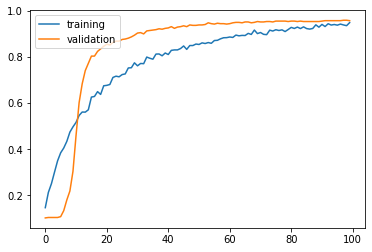

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()


In [28]:
results = model0.evaluate(X_test, y_test)

10/10 [==============================] - 2s 211ms/step - loss: 0.2229 - accuracy: 0.9533


In [29]:
print('Test accuracy: ', results[1])

Test accuracy:  0.95333331823349


## CNN 1

In [30]:
data_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
def cnn_1():
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=data_shape))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [31]:
model = cnn_1()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [33]:
tensorboard_model = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://985d928a3754.ngrok.io


In [39]:
%%time
history = model.fit(X_train, y_train, batch_size=4, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
675/675 [==============================] - 134s 198ms/step - loss: 1.7585 - accuracy: 0.3930 - val_loss: 0.3589 - val_accuracy: 0.8500
Epoch 2/10
675/675 [==============================] - 135s 200ms/step - loss: 0.5260 - accuracy: 0.8105 - val_loss: 0.3245 - val_accuracy: 0.8867
Epoch 3/10
675/675 [==============================] - 138s 204ms/step - loss: 0.3481 - accuracy: 0.8692 - val_loss: 0.1635 - val_accuracy: 0.9367
Epoch 4/10
675/675 [==============================] - 131s 194ms/step - loss: 0.2954 - accuracy: 0.8904 - val_loss: 0.1552 - val_accuracy: 0.9500
Epoch 5/10
675/675 [==============================] - 132s 195ms/step - loss: 0.2851 - accuracy: 0.8998 - val_loss: 0.1306 - val_accuracy: 0.9633
Epoch 6/10
675/675 [==============================] - 131s 195ms/step - loss: 0.2399 - accuracy: 0.9112 - val_loss: 0.1174 - val_accuracy: 0.9667
Epoch 7/10
675/675 [==============================] - 124s 183ms/step - loss: 0.2372 - accuracy: 0.9134 - val_loss: 0.1711 -

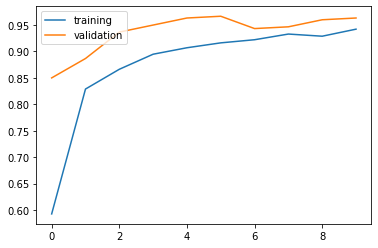

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.savefig('cnn1.png')
# plt.show()

In [42]:
results = model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 109ms/step - loss: 0.1386 - accuracy: 0.9633


In [43]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9633333086967468


## CNN 2

In [46]:
data_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
def cnn_2():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=data_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    adam = optimizers.RMSprop(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [47]:
model2 = cnn_2()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [48]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 31, 31, 64)       

In [52]:
%%time
history = model2.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0, validation_data=(X_test, y_test))

CPU times: user 4h 21min 35s, sys: 3min 44s, total: 4h 25min 20s
Wall time: 2h 17min 22s


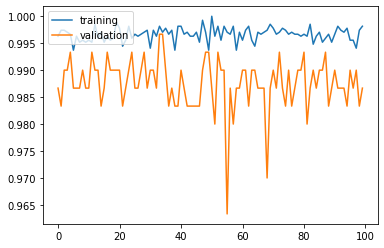

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.savefig('cnn2.png')
# plt.show()

In [54]:
results = model2.evaluate(X_test, y_test)

10/10 [==============================] - 2s 223ms/step - loss: 0.2550 - accuracy: 0.9867


In [55]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9866666793823242


## LSTM

In [56]:
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

In [57]:
X_train1 = X_train.reshape((X_train.shape[0],X_train.shape[1], X_train.shape[2] * X_train.shape[3]))
X_test1 = X_test.reshape((X_test.shape[0],X_test.shape[1], X_test.shape[2] * X_test.shape[3]))
print(X_test1.shape)

(300, 64, 192)


In [58]:
data_shape1 = (X_train1.shape[1], X_train1.shape[2])
def lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape = data_shape1, return_sequences = False))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [59]:
model = KerasClassifier(build_fn = lstm, epochs = 100, batch_size = 50, verbose = 1)

In [60]:
model.fit(X_train1, y_train,verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [61]:
y_pred = model.predict(X_test1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


6/6 [==============================] - 1s 18ms/step


In [63]:
y_test_ = np.argmax(y_test, axis = 1)

In [64]:
# accuracy improves by adopting LSTM structure
print(accuracy_score(y_pred, y_test_))

0.9266666666666666
